In [1]:
# STEP 1: Load CSV Data into Pandas
import pandas as pd
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("STEP 1: LOAD CSV DATA INTO PANDAS")
print("=" * 80)

# Define data path
csv_path = r"c:\Users\97336\OneDrive\Desktop\DataSci_Coursework\arriva_bus_data.csv"

# Load CSV
df = pd.read_csv(csv_path)

print(f"\n✓ CSV loaded successfully!")
print(f"  File: {Path(csv_path).name}")
print(f"  Size: {Path(csv_path).stat().st_size / (1024**2):.2f} MB")
print(f"  Rows: {len(df):,}")
print(f"  Columns: {len(df.columns)}")

# Display DataFrame info
print(f"\nDataFrame Info:")
print(df.info())

STEP 1: LOAD CSV DATA INTO PANDAS

✓ CSV loaded successfully!
  File: arriva_bus_data.csv
  Size: 18.23 MB
  Rows: 90,987
  Columns: 20

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90987 entries, 0 to 90986
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FileName        90987 non-null  object 
 1   OperatorName    90987 non-null  object 
 2   LineName        90987 non-null  object 
 3   Direction       90987 non-null  object 
 4   DepartureTime   90987 non-null  object 
 5   JourneyCode     90987 non-null  int64  
 6   Sequence        90987 non-null  int64  
 7   Activity        1916 non-null   object 
 8   TimingStatus    90987 non-null  object 
 9   RunTime         90987 non-null  object 
 10  FromStopRef     90987 non-null  object 
 11  FromStopName    90987 non-null  object 
 12  FromLat         90987 non-null  float64
 13  FromLon         90987 non-null  float64
 14  ToStopRef    

In [2]:
# STEP 2: Explore Data Structure and Schema

print("\n" + "=" * 80)
print("STEP 2: EXPLORE DATA STRUCTURE & SCHEMA")
print("=" * 80)

print(f"\nFirst 5 Rows:")
print(df.head())

print(f"\n\nColumn Data Types:")
print(df.dtypes)

print(f"\n\nDataset Dimensions:")
print(f"  Shape: {df.shape}")
print(f"  Columns: {df.columns.tolist()}")

print(f"\n\nBasic Statistics:")
print(df.describe())


STEP 2: EXPLORE DATA STRUCTURE & SCHEMA

First 5 Rows:
                                            FileName  OperatorName LineName  \
0  ACYM_RM11_ACYMPG000724525711M_20260125_-_22974...  Arriva Cymru      11M   
1  ACYM_RM11_ACYMPG000724525711M_20260125_-_22974...  Arriva Cymru      11M   
2  ACYM_RM11_ACYMPG000724525711M_20260125_-_22974...  Arriva Cymru      11M   
3  ACYM_RM11_ACYMPG000724525711M_20260125_-_22974...  Arriva Cymru      11M   
4  ACYM_RM11_ACYMPG000724525711M_20260125_-_22974...  Arriva Cymru      11M   

  Direction DepartureTime  JourneyCode  Sequence Activity  \
0   inbound      05:35:00         1008         1   pickUp   
1   inbound      05:35:00         1008         2      NaN   
2   inbound      05:35:00         1008         3      NaN   
3   inbound      05:35:00         1008         4      NaN   
4   inbound      05:35:00         1008         5      NaN   

           TimingStatus RunTime   FromStopRef    FromStopName    FromLat  \
0  principalTimingPoint   

In [3]:
# STEP 3: Handle Missing Values

print("\n" + "=" * 80)
print("STEP 3: HANDLE MISSING VALUES")
print("=" * 80)

# Check for missing values
print(f"\nMissing Values by Column:")
print("-" * 80)

missing_data = df.isnull().sum()
missing_pct = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_pct.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("  No missing values found!")

print(f"\nTotal Missing Values: {df.isnull().sum().sum():,}")

# Strategy for handling missing values
print(f"\n\nMissing Value Handling Strategy:")
print("-" * 80)
print("  • Coordinates (FromLat, FromLon, ToLat, ToLon): Drop rows with missing coords")
print("  • Times (DepartureTime, RunTime): Drop rows with missing times")
print("  • Stop names: Fill 'Unknown' where missing")
print("  • School info: Fill 'None' where missing")

# Apply cleaning strategy
df_clean = df.copy()

# Drop rows with missing critical coordinates
df_clean = df_clean.dropna(subset=['FromLat', 'FromLon', 'ToLat', 'ToLon'])
print(f"\n✓ Dropped rows with missing coordinates")

# Drop rows with missing times
df_clean = df_clean.dropna(subset=['DepartureTime', 'RunTime'])
print(f"✓ Dropped rows with missing times")

# Fill missing stop names
df_clean['FromStopName'] = df_clean['FromStopName'].fillna('Unknown Stop')
df_clean['ToStopName'] = df_clean['ToStopName'].fillna('Unknown Stop')
print(f"✓ Filled missing stop names")

# Fill missing organization name
df_clean['SchoolOrgName'] = df_clean['SchoolOrgName'].fillna('None')
print(f"✓ Filled missing organization names")

print(f"\nRecords After Cleaning: {len(df_clean):,} (removed {len(df) - len(df_clean):,})")
print(f"Data Loss: {((len(df) - len(df_clean)) / len(df) * 100):.2f}%")


STEP 3: HANDLE MISSING VALUES

Missing Values by Column:
--------------------------------------------------------------------------------
        Column  Missing_Count  Missing_Percentage
 SchoolOrgName          90023           98.940508
OperatingDates          90023           98.940508
      Activity          89071           97.894205

Total Missing Values: 269,117


Missing Value Handling Strategy:
--------------------------------------------------------------------------------
  • Coordinates (FromLat, FromLon, ToLat, ToLon): Drop rows with missing coords
  • Times (DepartureTime, RunTime): Drop rows with missing times
  • Stop names: Fill 'Unknown' where missing
  • School info: Fill 'None' where missing

✓ Dropped rows with missing coordinates
✓ Dropped rows with missing times
✓ Filled missing stop names
✓ Filled missing organization names

Records After Cleaning: 90,987 (removed 0)
Data Loss: 0.00%


In [4]:
# STEP 4: Data Type Conversion

print("\n" + "=" * 80)
print("STEP 4: DATA TYPE CONVERSION")
print("=" * 80)

print(f"\nOriginal Data Types:")
print(df_clean.dtypes)

# Convert numeric columns
print(f"\n\nConverting Data Types:")
print("-" * 80)

# Convert coordinates to float
df_clean['FromLat'] = pd.to_numeric(df_clean['FromLat'], errors='coerce')
df_clean['FromLon'] = pd.to_numeric(df_clean['FromLon'], errors='coerce')
df_clean['ToLat'] = pd.to_numeric(df_clean['ToLat'], errors='coerce')
df_clean['ToLon'] = pd.to_numeric(df_clean['ToLon'], errors='coerce')
print(f"✓ Coordinates → float64")

# Convert Sequence to integer
df_clean['Sequence'] = pd.to_numeric(df_clean['Sequence'], errors='coerce').astype('Int64')
print(f"✓ Sequence → Int64")

# Parse DepartureTime to time format
df_clean['DepartureTime'] = pd.to_datetime(df_clean['DepartureTime'], format='%H:%M:%S', errors='coerce').dt.time
print(f"✓ DepartureTime → time format")

# Convert RunTime to duration (parse PT format: PT1H30M, PT45M)
def parse_pt_format(pt_string):
    """Parse ISO 8601 duration format (PT format)"""
    if pd.isna(pt_string) or not isinstance(pt_string, str):
        return None
    
    import re
    match = re.match(r'PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?', pt_string)
    
    if match:
        hours = int(match.group(1)) if match.group(1) else 0
        minutes = int(match.group(2)) if match.group(2) else 0
        seconds = int(match.group(3)) if match.group(3) else 0
        total_minutes = hours * 60 + minutes + seconds / 60
        return total_minutes
    return None

df_clean['RunTimeMinutes'] = df_clean['RunTime'].apply(parse_pt_format)
print(f"✓ RunTime → RunTimeMinutes (numeric)")

# Convert text columns to category
categorical_cols = ['OperatorName', 'LineName', 'Direction', 'Activity', 'TimingStatus']
for col in categorical_cols:
    df_clean[col] = df_clean[col].astype('category')
print(f"✓ Text columns → category type (memory efficient)")

print(f"\n\nNew Data Types:")
print(df_clean.dtypes)

print(f"\n\nMemory Usage Reduction:")
print(f"  Before: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"  After:  {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
reduction_pct = ((df.memory_usage(deep=True).sum() - df_clean.memory_usage(deep=True).sum()) / df.memory_usage(deep=True).sum()) * 100
print(f"  Reduction: {reduction_pct:.1f}%")


STEP 4: DATA TYPE CONVERSION

Original Data Types:
FileName           object
OperatorName       object
LineName           object
Direction          object
DepartureTime      object
JourneyCode         int64
Sequence            int64
Activity           object
TimingStatus       object
RunTime            object
FromStopRef        object
FromStopName       object
FromLat           float64
FromLon           float64
ToStopRef          object
ToStopName         object
ToLat             float64
ToLon             float64
SchoolOrgName      object
OperatingDates     object
dtype: object


Converting Data Types:
--------------------------------------------------------------------------------
✓ Coordinates → float64
✓ Sequence → Int64
✓ DepartureTime → time format
✓ RunTime → RunTimeMinutes (numeric)
✓ Text columns → category type (memory efficient)


New Data Types:
FileName            object
OperatorName      category
LineName          category
Direction         category
DepartureTime       ob

In [5]:
# STEP 5: Remove Duplicates

print("\n" + "=" * 80)
print("STEP 5: REMOVE DUPLICATES")
print("=" * 80)

# Check for complete duplicates
print(f"\nChecking for Duplicate Rows:")
print("-" * 80)

duplicates_full = df_clean.duplicated().sum()
print(f"  Complete duplicates (all columns): {duplicates_full}")

# Check for duplicates in journey sequences (same journey, from, to, time)
duplicate_cols = ['JourneyCode', 'Sequence', 'FromStopRef', 'ToStopRef', 'DepartureTime']
duplicates_journey = df_clean.duplicated(subset=duplicate_cols, keep=False).sum()
print(f"  Journey sequence duplicates: {duplicates_journey}")

# Remove complete duplicates
df_clean = df_clean.drop_duplicates()
print(f"\n✓ Removed {duplicates_full} complete duplicate rows")

print(f"\nRecords After Deduplication: {len(df_clean):,}")

# Show sample of data
print(f"\n\nSample Records After Cleaning:")
print(df_clean.head(3))


STEP 5: REMOVE DUPLICATES

Checking for Duplicate Rows:
--------------------------------------------------------------------------------
  Complete duplicates (all columns): 0
  Journey sequence duplicates: 18520

✓ Removed 0 complete duplicate rows

Records After Deduplication: 90,987


Sample Records After Cleaning:
                                            FileName  OperatorName LineName  \
0  ACYM_RM11_ACYMPG000724525711M_20260125_-_22974...  Arriva Cymru      11M   
1  ACYM_RM11_ACYMPG000724525711M_20260125_-_22974...  Arriva Cymru      11M   
2  ACYM_RM11_ACYMPG000724525711M_20260125_-_22974...  Arriva Cymru      11M   

  Direction DepartureTime  JourneyCode  Sequence Activity  \
0   inbound      05:35:00         1008         1   pickUp   
1   inbound      05:35:00         1008         2      NaN   
2   inbound      05:35:00         1008         3      NaN   

           TimingStatus RunTime  ...  FromStopName    FromLat   FromLon  \
0  principalTimingPoint    PT2M  ...   Bus

In [6]:
# STEP 6: Validate and Clean Data Quality Issues

print("\n" + "=" * 80)
print("STEP 6: DATA VALIDATION & QUALITY")
print("=" * 80)

# 1. Geographic bounds validation (Wales: ~51.3-53.4°N, ~-5.3 to -2.3°E)
print(f"\n1. Geographic Bounds Check:")
print("-" * 80)

lat_min, lat_max = 51.0, 54.0
lon_min, lon_max = -6.0, -2.0

valid_coords = (
    (df_clean['FromLat'] >= lat_min) & (df_clean['FromLat'] <= lat_max) &
    (df_clean['ToLat'] >= lat_min) & (df_clean['ToLat'] <= lat_max) &
    (df_clean['FromLon'] >= lon_min) & (df_clean['FromLon'] <= lon_max) &
    (df_clean['ToLon'] >= lon_min) & (df_clean['ToLon'] <= lon_max)
)

print(f"  Valid coordinates: {valid_coords.sum():,}")
print(f"  Invalid coordinates: {(~valid_coords).sum()}")

# Remove records with invalid coordinates
df_clean = df_clean[valid_coords]

# 2. Time consistency check
print(f"\n2. Time Consistency Check:")
print("-" * 80)

print(f"  Departure times range: {df_clean['DepartureTime'].min()} to {df_clean['DepartureTime'].max()}")
print(f"  Runtime range: {df_clean['RunTimeMinutes'].min():.2f} to {df_clean['RunTimeMinutes'].max():.2f} minutes")

# Check for unrealistic runtimes (0 or extreme values)
runtime_issues = (df_clean['RunTimeMinutes'] <= 0) | (df_clean['RunTimeMinutes'] > 480)  # max 8 hours
print(f"  Unrealistic runtimes: {runtime_issues.sum()}")

if runtime_issues.sum() > 0:
    # Remove extremely long runtimes (likely data errors)
    df_clean = df_clean[~runtime_issues]
    print(f"  ✓ Removed {runtime_issues.sum()} records with unrealistic runtimes")

# 3. Distance validation
print(f"\n3. Calculate Distance From Coordinates:")
print("-" * 80)

from math import radians, cos, sin, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    """Calculate distance between two coordinates in km"""
    R = 6371  # Earth radius in km
    
    lat1_rad = radians(lat1)
    lat2_rad = radians(lat2)
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    
    a = sin(dlat/2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    
    return R * c

# Vectorized distance calculation
df_clean['DistanceKm'] = df_clean.apply(
    lambda row: haversine_distance(row['FromLat'], row['FromLon'], 
                                   row['ToLat'], row['ToLon']), 
    axis=1
)

print(f"  Distance statistics (km):")
print(df_clean['DistanceKm'].describe())

# 4. Sanity check: Calculate implied speed
df_clean['ImpliedSpeedKmh'] = (df_clean['DistanceKm'] / df_clean['RunTimeMinutes']) * 60

print(f"\n4. Speed Sanity Check:")
print("-" * 80)
print(f"  Average speed: {df_clean['ImpliedSpeedKmh'].mean():.2f} km/h")
print(f"  Max speed: {df_clean['ImpliedSpeedKmh'].max():.2f} km/h")
print(f"  Records exceeding 100 km/h: {(df_clean['ImpliedSpeedKmh'] > 100).sum()}")

# Remove unrealistic speeds (buses rarely exceed 80 km/h average)
speed_issues = df_clean['ImpliedSpeedKmh'] > 120
if speed_issues.sum() > 0:
    print(f"  ✓ Removing {speed_issues.sum()} records with unrealistic speeds (>120 km/h)")
    df_clean = df_clean[~speed_issues]

print(f"\n✓ Data Validation Complete")
print(f"Records After Quality Checks: {len(df_clean):,}")


STEP 6: DATA VALIDATION & QUALITY

1. Geographic Bounds Check:
--------------------------------------------------------------------------------
  Valid coordinates: 90,987
  Invalid coordinates: 0

2. Time Consistency Check:
--------------------------------------------------------------------------------
  Departure times range: 00:05:00 to 23:55:00
  Runtime range: 0.00 to 27.00 minutes
  Unrealistic runtimes: 28520
  ✓ Removed 28520 records with unrealistic runtimes

3. Calculate Distance From Coordinates:
--------------------------------------------------------------------------------
  Distance statistics (km):
count    62467.000000
mean         0.443011
std          0.413405
min          0.030534
25%          0.241963
50%          0.338367
75%          0.498219
max          6.519399
Name: DistanceKm, dtype: float64

4. Speed Sanity Check:
--------------------------------------------------------------------------------
  Average speed: 19.45 km/h
  Max speed: 103.36 km/h
  Records

In [7]:
# STEP 7: Standardize Column Names and Formats

print("\n" + "=" * 80)
print("STEP 7: STANDARDIZE COLUMN NAMES & FORMATS")
print("=" * 80)

print(f"\nOriginal Column Names:")
print(df_clean.columns.tolist())

# Convert column names to lowercase with underscores
df_clean.columns = df_clean.columns.str.lower().str.replace(' ', '_')

print(f"\n✓ Column names standardized to lowercase with underscores")

print(f"\nNew Column Names:")
print(df_clean.columns.tolist())

# Standardize text fields (trim whitespace, consistent capitalization)
text_cols = ['operatorname', 'linename', 'direction', 'activity', 'timingstatus', 
             'fromstopname', 'tostopname', 'schoolorgname']

for col in text_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].str.strip()
        if col in ['linename', 'operatorname']:
            df_clean[col] = df_clean[col].str.title()

print(f"✓ Text fields standardized (trimmed, title case where appropriate)")

# Reorder columns logically
column_order = [
    'filename',
    'journeycode',
    'sequence',
    'operatorname',
    'linename',
    'direction',
    'departuretime',
    'runtimeminutes',
    'fromstopref',
    'fromstopname',
    'fromlat',
    'fromlon',
    'tostopref',
    'tostopname',
    'tolat',
    'tolon',
    'distancekm',
    'impliedspeedkmh',
    'activity',
    'timingstatus',
    'schoolorgname',
    'operatingdates'
]

# Only include columns that exist
column_order = [col for col in column_order if col in df_clean.columns]
df_clean = df_clean[column_order]

print(f"\n✓ Columns reordered logically")
print(f"\nFinal Column Structure:")
for i, col in enumerate(df_clean.columns, 1):
    print(f"  {i:2d}. {col:25s} - {df_clean[col].dtype}")


STEP 7: STANDARDIZE COLUMN NAMES & FORMATS

Original Column Names:
['FileName', 'OperatorName', 'LineName', 'Direction', 'DepartureTime', 'JourneyCode', 'Sequence', 'Activity', 'TimingStatus', 'RunTime', 'FromStopRef', 'FromStopName', 'FromLat', 'FromLon', 'ToStopRef', 'ToStopName', 'ToLat', 'ToLon', 'SchoolOrgName', 'OperatingDates', 'RunTimeMinutes', 'DistanceKm', 'ImpliedSpeedKmh']

✓ Column names standardized to lowercase with underscores

New Column Names:
['filename', 'operatorname', 'linename', 'direction', 'departuretime', 'journeycode', 'sequence', 'activity', 'timingstatus', 'runtime', 'fromstopref', 'fromstopname', 'fromlat', 'fromlon', 'tostopref', 'tostopname', 'tolat', 'tolon', 'schoolorgname', 'operatingdates', 'runtimeminutes', 'distancekm', 'impliedspeedkmh']
✓ Text fields standardized (trimmed, title case where appropriate)

✓ Columns reordered logically

Final Column Structure:
   1. filename                  - object
   2. journeycode               - int64
   3. se

In [8]:
# STEP 8: Export Cleaned Dataset

print("\n" + "=" * 80)
print("STEP 8: EXPORT CLEANED DATASET")
print("=" * 80)

output_dir = Path(r"c:\Users\97336\OneDrive\Desktop\DataSci_Coursework")

# Option 1: Save as CSV (human-readable)
csv_output = output_dir / "arriva_cleaned_data.csv"
df_clean.to_csv(csv_output, index=False)
print(f"\n✓ Saved as CSV: {csv_output.name}")
print(f"  Size: {csv_output.stat().st_size / (1024**2):.2f} MB")

# Option 2: Save as Pickle (Python-native, preserves types)
pickle_output = output_dir / "arriva_cleaned_data.pkl"
df_clean.to_pickle(pickle_output)
print(f"\n✓ Saved as Pickle: {pickle_output.name}")
print(f"  Size: {pickle_output.stat().st_size / (1024**2):.2f} MB")

# Optional: Save as Excel (first 10k rows for readability)
excel_output = output_dir / "arriva_cleaned_sample.xlsx"
df_clean.head(10000).to_excel(excel_output, index=False)
print(f"\n✓ Saved sample as Excel: {excel_output.name}")

print(f"\n\nFinal Cleaned Dataset Summary:")
print("=" * 80)
print(f"Total Records: {len(df_clean):,}")
print(f"Total Columns: {len(df_clean.columns)}")
print(f"Memory Usage: {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nData Quality Metrics:")
print(f"  ✓ Missing values: {df_clean.isnull().sum().sum()}")
print(f"  ✓ Duplicates removed")
print(f"  ✓ Data types standardized")
print(f"  ✓ Coordinates validated (Wales bounds)")
print(f"  ✓ Distance calculated via Haversine formula")
print(f"  ✓ Speed validated (outliers removed)")
print(f"\nReady for Analysis & Machine Learning!")
print(f"\nFiles Available for Next Phase:")
print(f"  1. {csv_output.name} - CSV format for exploration")
print(f"  2. {pickle_output.name} - Pickle format for ML pipeline")
print(f"  3. {excel_output.name} - Excel sample for reporting")


STEP 8: EXPORT CLEANED DATASET

✓ Saved as CSV: arriva_cleaned_data.csv
  Size: 14.89 MB

✓ Saved as Pickle: arriva_cleaned_data.pkl
  Size: 10.35 MB

✓ Saved sample as Excel: arriva_cleaned_sample.xlsx


Final Cleaned Dataset Summary:
Total Records: 62,467
Total Columns: 22
Memory Usage: 53.77 MB

Data Quality Metrics:
  ✓ Missing values: 122874
  ✓ Duplicates removed
  ✓ Data types standardized
  ✓ Coordinates validated (Wales bounds)
  ✓ Distance calculated via Haversine formula
  ✓ Speed validated (outliers removed)

Ready for Analysis & Machine Learning!

Files Available for Next Phase:
  1. arriva_cleaned_data.csv - CSV format for exploration
  2. arriva_cleaned_data.pkl - Pickle format for ML pipeline
  3. arriva_cleaned_sample.xlsx - Excel sample for reporting


In [6]:
# ============================================================================
# PHASE 1: DATA STORAGE & PROCESSING
# Complete solution - run all at once
# ============================================================================

import pandas as pd
import sqlite3
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("PHASE 1: DATA STORAGE & PROCESSING")
print("="*80)

PHASE 1: DATA STORAGE & PROCESSING


In [7]:
# ============================================================================
# STEP 1: LOAD CLEANED DATA
# ============================================================================
print("\n[STEP 1] Loading Cleaned Data...")

base = Path(r'c:\Users\97336\OneDrive\Desktop\DataSci_Coursework')
pkl = base / 'arriva_cleaned_data.pkl'
csv = base / 'arriva_cleaned_data.csv'

if pkl.exists():
    df = pd.read_pickle(pkl)
    print(f"✓ Loaded from pickle: {len(df):,} rows")
elif csv.exists():
    df = pd.read_csv(csv)
    print(f"✓ Loaded from CSV: {len(df):,} rows")
else:
    raise FileNotFoundError('Cleaned dataset not found')

print(f"\nDataFrame Info:")
print(f"  Shape: {df.shape}")
print(f"  Columns: {df.columns.tolist()}")
print(f"\nSample:")
print(df.head(3))


[STEP 1] Loading Cleaned Data...
✓ Loaded from pickle: 62,467 rows

DataFrame Info:
  Shape: (62467, 22)
  Columns: ['filename', 'journeycode', 'sequence', 'operatorname', 'linename', 'direction', 'departuretime', 'runtimeminutes', 'fromstopref', 'fromstopname', 'fromlat', 'fromlon', 'tostopref', 'tostopname', 'tolat', 'tolon', 'distancekm', 'impliedspeedkmh', 'activity', 'timingstatus', 'schoolorgname', 'operatingdates']

Sample:
                                            filename  journeycode  sequence  \
0  ACYM_RM11_ACYMPG000724525711M_20260125_-_22974...         1008         1   
1  ACYM_RM11_ACYMPG000724525711M_20260125_-_22974...         1008         2   
2  ACYM_RM11_ACYMPG000724525711M_20260125_-_22974...         1008         3   

   operatorname linename direction departuretime  runtimeminutes  \
0  Arriva Cymru      11M   inbound      05:35:00             2.0   
1  Arriva Cymru      11M   inbound      05:35:00             1.0   
2  Arriva Cymru      11M   inbound      05:

In [8]:
# ============================================================================
# STEP 2: CREATE SQLITE DATABASE
# ============================================================================
print("\n[STEP 2] Creating SQLite Database...")

db_path = base / 'arriva_transport.db'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

print(f"✓ Database created at: {db_path}")


[STEP 2] Creating SQLite Database...
✓ Database created at: c:\Users\97336\OneDrive\Desktop\DataSci_Coursework\arriva_transport.db


In [9]:
# ============================================================================
# STEP 3: CREATE TABLE 1 - OPERATORS
# ============================================================================
print("\n[STEP 3] Creating Table 1: Operators...")

operators = df[['operatorname']].drop_duplicates().reset_index(drop=True)
operators['OperatorID'] = range(1, len(operators) + 1)
operators = operators[['OperatorID', 'operatorname']]
operators.columns = ['OperatorID', 'OperatorName']

print(f"  ✓ {len(operators)} unique operators")
print(operators)


[STEP 3] Creating Table 1: Operators...
  ✓ 1 unique operators
   OperatorID  OperatorName
0           1  Arriva Cymru


In [10]:
# ============================================================================
# STEP 4: CREATE TABLE 2 - ROUTES
# ============================================================================
print("\n[STEP 4] Creating Table 2: Routes...")

routes = df[['operatorname', 'linename', 'direction']].drop_duplicates().reset_index(drop=True)
routes = routes.merge(operators, left_on='operatorname', right_on='OperatorName', how='left')
routes['RouteID'] = range(1, len(routes) + 1)
routes = routes[['RouteID', 'OperatorID', 'linename', 'direction']]
routes.columns = ['RouteID', 'OperatorID', 'LineName', 'Direction']

print(f"  ✓ {len(routes)} unique routes")
print(routes.head(10))


[STEP 4] Creating Table 2: Routes...
  ✓ 40 unique routes
   RouteID  OperatorID LineName Direction
0        1           1      11M   inbound
1        2           1      83A  outbound
2        3           1      84A  outbound
3        4           1      T51  outbound
4        5           1      T51   inbound
5        6           1      X12   inbound
6        7           1      X12  outbound
7        8           1        3  outbound
8        9           1        5   inbound
9       10           1        5  outbound


In [11]:
# ============================================================================
# STEP 5: CREATE TABLE 3 - STOPS
# ============================================================================
print("\n[STEP 5] Creating Table 3: Stops...")

# Combine from and to stops
from_stops = df[['fromstopref', 'fromstopname', 'fromlat', 'fromlon']].copy()
from_stops.columns = ['StopRef', 'StopName', 'Latitude', 'Longitude']

to_stops = df[['tostopref', 'tostopname', 'tolat', 'tolon']].copy()
to_stops.columns = ['StopRef', 'StopName', 'Latitude', 'Longitude']

stops = pd.concat([from_stops, to_stops], ignore_index=True)
stops = stops.drop_duplicates(subset=['StopRef']).reset_index(drop=True)
stops['StopID'] = range(1, len(stops) + 1)
stops = stops[['StopID', 'StopRef', 'StopName', 'Latitude', 'Longitude']]

print(f"  ✓ {len(stops)} unique stops")
print(stops.head(10))


[STEP 5] Creating Table 3: Stops...
  ✓ 1187 unique stops
   StopID       StopRef          StopName   Latitude  Longitude
0       1  5110WDB48302       Bus Station  53.318918  -3.488659
1       2  5110WDB24251      Queen`s Walk  53.324564  -3.483178
2       3  5110AWD72226       Medea Drive  53.326544  -3.474297
3       4  5110AWD72227    Denmore Stores  53.327240  -3.469546
4       5  5110AWD72230         Golf Club  53.328193  -3.462987
5       6  5110AWD72232   Robin Hood Camp  53.329631  -3.452735
6       7  5110AWF80149      Arfon Avenue  53.330654  -3.445487
7       8  5110AWF80148  Earlswood Avenue  53.331511  -3.439299
8       9  5110WDB46679        Brig-y-Don  53.332735  -3.434654
9      10  5110WDB48351      Ffrith Hotel  53.334131  -3.429220


In [12]:
# ============================================================================
# STEP 6: CREATE TABLE 4 - JOURNEYS
# ============================================================================
print("\n[STEP 6] Creating Table 4: Journeys...")

# Get unique journeys
journeys_raw = df[['journeycode', 'linename', 'direction', 'departuretime', 
                    'runtimeminutes', 'schoolorgname', 'operatingdates']].drop_duplicates(
    subset=['journeycode', 'departuretime']).reset_index(drop=True)

# Link to routes
journeys = journeys_raw.merge(
    routes[['RouteID', 'LineName', 'Direction']],
    left_on=['linename', 'direction'],
    right_on=['LineName', 'Direction'],
    how='left'
)

# Create JourneyID
journeys['JourneyID'] = range(1, len(journeys) + 1)

# Select final columns
journeys = journeys[['JourneyID', 'RouteID', 'journeycode', 'departuretime', 
                     'runtimeminutes', 'schoolorgname', 'operatingdates']]
journeys.columns = ['JourneyID', 'RouteID', 'JourneyCode', 'DepartureTime', 
                    'RunTimeMinutes', 'SchoolOrgName', 'OperatingDates']

print(f"  ✓ {len(journeys)} unique journeys")
print(journeys.head(10))


[STEP 6] Creating Table 4: Journeys...
  ✓ 1664 unique journeys
   JourneyID  RouteID  JourneyCode DepartureTime  RunTimeMinutes  \
0          1        1         1008      05:35:00             2.0   
1          2        1         1012      06:40:00             2.0   
2          3        1         1020      07:40:00             2.0   
3          4        1         1024      08:40:00             2.0   
4          5        1         1028      09:40:00             2.0   
5          6        1         1032      10:40:00             2.0   
6          7        1         1036      11:40:00             2.0   
7          8        1         1040      12:40:00             2.0   
8          9        1         1044      13:40:00             2.0   
9         10        1         1050      14:40:00             2.0   

  SchoolOrgName OperatingDates  
0          None            NaN  
1          None            NaN  
2          None            NaN  
3          None            NaN  
4          None      

In [13]:
# ============================================================================
# STEP 7: CREATE TABLE 5 - STOP SEQUENCES
# ============================================================================
print("\n[STEP 7] Creating Table 5: StopSequences...")

# Create a lookup dictionary for JourneyID (faster than merge)
journey_lookup = journeys.set_index(['JourneyCode', 'DepartureTime'])['JourneyID'].to_dict()

# Create a lookup dictionary for StopID
from_stop_lookup = stops.set_index('StopRef')['StopID'].to_dict()
to_stop_lookup = stops.set_index('StopRef')['StopID'].to_dict()

# Build stop sequences using dictionary lookups
stop_sequences_data = []
for idx, row in df.iterrows():
    journey_id = journey_lookup.get((row['journeycode'], row['departuretime']))
    from_stop_id = from_stop_lookup.get(row['fromstopref'])
    to_stop_id = to_stop_lookup.get(row['tostopref'])
    
    stop_sequences_data.append({
        'JourneyID': journey_id,
        'Sequence': row['sequence'],
        'FromStopID': from_stop_id,
        'ToStopID': to_stop_id,
        'DistanceKm': row['distancekm'],
        'ImpliedSpeedKmh': row['impliedspeedkmh'],
        'Activity': row['activity'],
        'TimingStatus': row['timingstatus']
    })

stop_sequences = pd.DataFrame(stop_sequences_data)
stop_sequences['SequenceID'] = range(1, len(stop_sequences) + 1)
stop_sequences = stop_sequences[['SequenceID', 'JourneyID', 'Sequence', 'FromStopID', 
                                 'ToStopID', 'DistanceKm', 'ImpliedSpeedKmh',
                                 'Activity', 'TimingStatus']]

print(f"  ✓ {len(stop_sequences)} stop sequences")
print(stop_sequences.head(10))


[STEP 7] Creating Table 5: StopSequences...
  ✓ 62467 stop sequences
   SequenceID  JourneyID  Sequence  FromStopID  ToStopID  DistanceKm  \
0           1          1         1           1         2    0.725719   
1           2          1         2           2         3    0.629567   
2           3          1         3           3         4    0.324872   
3           4          1         4           4         5    0.448286   
4           5          1         5           5      1071    0.372929   
5           6          1         7           6      1072    0.310576   
6           7          1         9           7         8    0.421816   
7           8          1        10           8         9    0.337135   
8           9          1        11           9        10    0.392796   
9          10          1        12          10        11    0.543090   

   ImpliedSpeedKmh Activity          TimingStatus  
0        21.771574   pickUp  principalTimingPoint  
1        37.774021      NaN      

In [14]:
# ============================================================================
# STEP 8: SAVE ALL TABLES TO DATABASE
# ============================================================================
print("\n[STEP 8] Saving Tables to SQLite Database...")

operators.to_sql('Operators', conn, if_exists='replace', index=False)
print(f"  ✓ Operators: {len(operators)} rows")

routes.to_sql('Routes', conn, if_exists='replace', index=False)
print(f"  ✓ Routes: {len(routes)} rows")

stops.to_sql('Stops', conn, if_exists='replace', index=False)
print(f"  ✓ Stops: {len(stops)} rows")

journeys.to_sql('Journeys', conn, if_exists='replace', index=False)
print(f"  ✓ Journeys: {len(journeys)} rows")

stop_sequences.to_sql('StopSequences', conn, if_exists='replace', index=False)
print(f"  ✓ StopSequences: {len(stop_sequences)} rows")


[STEP 8] Saving Tables to SQLite Database...
  ✓ Operators: 1 rows
  ✓ Routes: 40 rows
  ✓ Stops: 1187 rows
  ✓ Journeys: 1664 rows
  ✓ StopSequences: 62467 rows


In [15]:
# ============================================================================
# STEP 9: CREATE INDEXES FOR PERFORMANCE
# ============================================================================
print("\n[STEP 9] Creating Indexes...")

cursor.execute('CREATE INDEX IF NOT EXISTS idx_routes_operator ON Routes(OperatorID)')
cursor.execute('CREATE INDEX IF NOT EXISTS idx_journeys_route ON Journeys(RouteID)')
cursor.execute('CREATE INDEX IF NOT EXISTS idx_sequences_journey ON StopSequences(JourneyID)')
cursor.execute('CREATE INDEX IF NOT EXISTS idx_sequences_fromstop ON StopSequences(FromStopID)')
cursor.execute('CREATE INDEX IF NOT EXISTS idx_sequences_tostop ON StopSequences(ToStopID)')

conn.commit()
print("  ✓ Indexes created")


[STEP 9] Creating Indexes...
  ✓ Indexes created


In [16]:
# ============================================================================
# STEP 10: VERIFY DATABASE
# ============================================================================
print("\n[STEP 10] Verifying Database Structure...")

cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = cursor.fetchall()
print(f"\nDatabase Tables:")
for table in tables:
    cursor.execute(f"SELECT COUNT(*) FROM {table[0]}")
    count = cursor.fetchone()[0]
    print(f"  - {table[0]}: {count:,} rows")


[STEP 10] Verifying Database Structure...

Database Tables:
  - Operators: 1 rows
  - Routes: 40 rows
  - Stops: 1,187 rows
  - Journeys: 1,664 rows
  - StopSequences: 62,467 rows


In [17]:
# ============================================================================
# STEP 11: DEMONSTRATE RELATIONSHIPS
# ============================================================================
print("\n[STEP 11] Demonstrating SQL Relationships...")

print("\n--- Query 1: Routes with Journey Counts ---")
query1 = """
    SELECT 
        r.RouteID,
        o.OperatorName,
        r.LineName,
        r.Direction,
        COUNT(DISTINCT j.JourneyID) as Journeys
    FROM Routes r
    JOIN Operators o ON r.OperatorID = o.OperatorID
    JOIN Journeys j ON r.RouteID = j.RouteID
    GROUP BY r.RouteID
    ORDER BY Journeys DESC
    LIMIT 10
"""
result1 = pd.read_sql(query1, conn)
print(result1.to_string(index=False))

print("\n--- Query 2: Journey Details with Stop Pairs ---")
query2 = """
    SELECT 
        j.JourneyCode,
        r.LineName,
        j.DepartureTime,
        s1.StopName as FromStop,
        s2.StopName as ToStop,
        ss.DistanceKm,
        ss.ImpliedSpeedKmh
    FROM Journeys j
    JOIN Routes r ON j.RouteID = r.RouteID
    JOIN StopSequences ss ON j.JourneyID = ss.JourneyID
    JOIN Stops s1 ON ss.FromStopID = s1.StopID
    JOIN Stops s2 ON ss.ToStopID = s2.StopID
    LIMIT 10
"""
result2 = pd.read_sql(query2, conn)
print(result2.to_string(index=False))

print("\n--- Query 3: Busiest Stops ---")
query3 = """
    SELECT 
        s.StopName,
        ROUND(s.Latitude, 4) as Lat,
        ROUND(s.Longitude, 4) as Lon,
        COUNT(*) as Occurrences
    FROM Stops s
    JOIN StopSequences ss ON s.StopID = ss.FromStopID OR s.StopID = ss.ToStopID
    GROUP BY s.StopID
    ORDER BY Occurrences DESC
    LIMIT 10
"""
result3 = pd.read_sql(query3, conn)
print(result3.to_string(index=False))


[STEP 11] Demonstrating SQL Relationships...

--- Query 1: Routes with Journey Counts ---
 RouteID OperatorName LineName Direction  Journeys
       4 Arriva Cymru      T51  outbound       181
       5 Arriva Cymru      T51   inbound       158
      16 Arriva Cymru        1   inbound       140
      17 Arriva Cymru        1  outbound       139
      34 Arriva Cymru       12  outbound        92
       9 Arriva Cymru        5   inbound        67
      10 Arriva Cymru        5  outbound        64
       8 Arriva Cymru        3  outbound        58
      12 Arriva Cymru        7  outbound        55
      35 Arriva Cymru       2C  outbound        52

--- Query 2: Journey Details with Stop Pairs ---
 JourneyCode LineName   DepartureTime         FromStop             ToStop  DistanceKm  ImpliedSpeedKmh
        1008      11M 05:35:00.000000      Bus Station       Queen`s Walk    0.725719        21.771574
        1008      11M 05:35:00.000000     Queen`s Walk        Medea Drive    0.629567       

In [18]:
# ============================================================================
# STEP 12: CREATE ANALYTICS DATAFRAME
# ============================================================================
print("\n[STEP 12] Creating Analytics DataFrame...")

analytics_df = pd.read_sql("""
    SELECT 
        j.JourneyID,
        j.JourneyCode,
        o.OperatorName,
        r.LineName,
        r.Direction,
        j.DepartureTime,
        j.RunTimeMinutes,
        j.SchoolOrgName,
        j.OperatingDates,
        ss.Sequence,
        s1.StopRef as FromStopRef,
        s1.StopName as FromStop,
        s1.Latitude as FromLat,
        s1.Longitude as FromLon,
        s2.StopRef as ToStopRef,
        s2.StopName as ToStop,
        s2.Latitude as ToLat,
        s2.Longitude as ToLon,
        ss.DistanceKm,
        ss.ImpliedSpeedKmh,
        ss.Activity,
        ss.TimingStatus
    FROM Journeys j
    JOIN Routes r ON j.RouteID = r.RouteID
    JOIN Operators o ON r.OperatorID = o.OperatorID
    JOIN StopSequences ss ON j.JourneyID = ss.JourneyID
    JOIN Stops s1 ON ss.FromStopID = s1.StopID
    JOIN Stops s2 ON ss.ToStopID = s2.StopID
    ORDER BY j.JourneyID, ss.Sequence
""", conn)

print(f"✓ Analytics DataFrame created: {analytics_df.shape}")
print(f"  Columns: {list(analytics_df.columns)}")
print(f"\nFirst 5 rows:")
print(analytics_df.head())

# Save for next phase
analytics_path = base / 'analytics_dataframe.pkl'
analytics_df.to_pickle(analytics_path)
print(f"\n✓ Saved analytics dataframe to: {analytics_path}")



[STEP 12] Creating Analytics DataFrame...
✓ Analytics DataFrame created: (62467, 22)
  Columns: ['JourneyID', 'JourneyCode', 'OperatorName', 'LineName', 'Direction', 'DepartureTime', 'RunTimeMinutes', 'SchoolOrgName', 'OperatingDates', 'Sequence', 'FromStopRef', 'FromStop', 'FromLat', 'FromLon', 'ToStopRef', 'ToStop', 'ToLat', 'ToLon', 'DistanceKm', 'ImpliedSpeedKmh', 'Activity', 'TimingStatus']

First 5 rows:
   JourneyID  JourneyCode  OperatorName LineName Direction    DepartureTime  \
0          1         1008  Arriva Cymru      11M   inbound  05:35:00.000000   
1          1         1008  Arriva Cymru      11M   inbound  05:35:00.000000   
2          1         1008  Arriva Cymru      11M   inbound  05:35:00.000000   
3          1         1008  Arriva Cymru      11M   inbound  05:35:00.000000   
4          1         1008  Arriva Cymru      11M   inbound  05:35:00.000000   

   RunTimeMinutes SchoolOrgName OperatingDates  Sequence  ...    FromLat  \
0             2.0          None   

In [19]:
# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n" + "="*80)
print("PHASE 1 COMPLETE: DATA STORAGE & PROCESSING SUMMARY")
print("="*80)

summary = pd.DataFrame({
    'Table': ['Operators', 'Routes', 'Stops', 'Journeys', 'StopSequences'],
    'Rows': [len(operators), len(routes), len(stops), len(journeys), len(stop_sequences)],
    'Purpose': [
        'Transport operators',
        'Unique routes',
        'Unique stops with coordinates',
        'Journey metadata',
        'Stop-to-stop segments with distances'
    ],
    'Key Relationships': [
        'Root table',
        '→ Operators (OperatorID)',
        'Referenced by StopSequences',
        '→ Routes (RouteID)',
        '→ Journeys, Stops (foreign keys)'
    ]
})

print(summary.to_string(index=False))

print(f"\n✓ SQLite Database: {db_path}")
print(f"✓ Analytics DataFrame: {analytics_path}")
print(f"✓ Ready for PHASE 2: Analytics & Prediction")

conn.close()


PHASE 1 COMPLETE: DATA STORAGE & PROCESSING SUMMARY
        Table  Rows                              Purpose                Key Relationships
    Operators     1                  Transport operators                       Root table
       Routes    40                        Unique routes         → Operators (OperatorID)
        Stops  1187        Unique stops with coordinates      Referenced by StopSequences
     Journeys  1664                     Journey metadata               → Routes (RouteID)
StopSequences 62467 Stop-to-stop segments with distances → Journeys, Stops (foreign keys)

✓ SQLite Database: c:\Users\97336\OneDrive\Desktop\DataSci_Coursework\arriva_transport.db
✓ Analytics DataFrame: c:\Users\97336\OneDrive\Desktop\DataSci_Coursework\analytics_dataframe.pkl
✓ Ready for PHASE 2: Analytics & Prediction


In [30]:
# ============================================================================
# PHASE 3: ANALYTICS & PREDICTION
# Complete ML Pipeline for Transport Data Analysis
# ============================================================================

import pandas as pd
import numpy as np
from pathlib import Path
import sqlite3
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    mean_squared_error, mean_absolute_error, r2_score,
    silhouette_score
)

print("="*80)
print("PHASE 2: ANALYTICS & PREDICTION")
print("="*80)

PHASE 2: ANALYTICS & PREDICTION


In [32]:
# ============================================================================
# STEP 1: LOAD DATA & FEATURE ENGINEERING
# ============================================================================
print("\n[STEP 1] Loading Data & Feature Engineering...")

base = Path(r'c:\Users\97336\OneDrive\Desktop\DataSci_Coursework')
df = pd.read_pickle(base / 'analytics_dataframe.pkl')
print(f"✓ Loaded: {len(df):,} rows")

# Extract hour from departure time
df['DepartureHour'] = df['DepartureTime'].apply(
    lambda x: int(str(x).split(':')[0]) if pd.notna(x) else np.nan
)

# Convert to numeric
df['DistanceKm'] = pd.to_numeric(df['DistanceKm'], errors='coerce')
df['RunTimeMinutes'] = pd.to_numeric(df['RunTimeMinutes'], errors='coerce')
df['ImpliedSpeedKmh'] = pd.to_numeric(df['ImpliedSpeedKmh'], errors='coerce')

# Calculate expected runtime per segment (for delay detection)
segment_median = df.groupby(['FromStopRef', 'ToStopRef'])['RunTimeMinutes'].median()
df['ExpectedRuntime'] = df.apply(
    lambda row: segment_median.get((row['FromStopRef'], row['ToStopRef']), np.nan), 
    axis=1
)

# Target 1: IsDelayed (1 if delayed, 0 if on-time)
# Delayed = runtime > expected + 5 min OR > 1.5x expected
df['IsDelayed'] = (
    (df['RunTimeMinutes'] > df['ExpectedRuntime'] + 5) | 
    (df['RunTimeMinutes'] > 1.5 * df['ExpectedRuntime'])
).astype(int)

# Target 2: IsPeakHour (1 if peak hour, 0 if off-peak)
# Peak hours: 7-9 AM (morning rush) and 4-7 PM (evening rush)
df['IsPeakHour'] = df['DepartureHour'].apply(
    lambda x: 1 if x in [7, 8, 16, 17, 18] else 0 if pd.notna(x) else np.nan
)

# Create clean modeling dataset
model_df = df.dropna(subset=['RunTimeMinutes', 'DistanceKm', 'DepartureHour', 
                              'ImpliedSpeedKmh', 'ExpectedRuntime']).copy()

print(f"✓ Clean dataset: {len(model_df):,} rows")
print(f"  Delays: {model_df['IsDelayed'].sum()} ({model_df['IsDelayed'].mean()*100:.1f}%)")
print(f"  Peak hours: {model_df['IsPeakHour'].sum()} ({model_df['IsPeakHour'].mean()*100:.1f}%)")


[STEP 1] Loading Data & Feature Engineering...
✓ Loaded: 62,467 rows
✓ Clean dataset: 62,467 rows
  Delays: 5041 (8.1%)
  Peak hours: 19661 (31.5%)


In [33]:
# ============================================================================
# TASK 1: PREDICT TIMETABLE DELAYS (CLASSIFICATION)
# ============================================================================
print("\n" + "="*80)
print("TASK 1: PREDICT TIMETABLE DELAYS OR NON-COMPLIANCE")
print("="*80)

print("\nObjective: Classify journeys as delayed (1) or on-time (0)")

# Prepare features
delay_features = ['DistanceKm', 'DepartureHour', 'ImpliedSpeedKmh', 'ExpectedRuntime']
X_delay = model_df[delay_features]
y_delay = model_df['IsDelayed']

# Train-test split
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_delay, y_delay, test_size=0.2, random_state=42, stratify=y_delay
)

print(f"\nDataset: Train={len(X_train_d):,}, Test={len(X_test_d):,}")

# --- Model 1: Logistic Regression (Baseline) ---
print("\n--- Model 1: Logistic Regression (Baseline) ---")
start_time = time.time()
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_d, y_train_d)
lr_train_time = time.time() - start_time

start_time = time.time()
y_pred_lr = lr_model.predict(X_test_d)
lr_pred_time = time.time() - start_time

lr_acc = accuracy_score(y_test_d, y_pred_lr)
lr_f1 = f1_score(y_test_d, y_pred_lr, zero_division=0)

print(f"Accuracy:  {lr_acc:.4f}")
print(f"F1-Score:  {lr_f1:.4f}")
print(f"Training time: {lr_train_time:.4f}s")
print(f"Complexity: O(n·m·i) - n=samples, m=features, i=iterations")

# --- Model 2: Decision Tree ---
print("\n--- Model 2: Decision Tree ---")
start_time = time.time()
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train_d, y_train_d)
dt_train_time = time.time() - start_time

y_pred_dt = dt_model.predict(X_test_d)
dt_acc = accuracy_score(y_test_d, y_pred_dt)
dt_f1 = f1_score(y_test_d, y_pred_dt, zero_division=0)

print(f"Accuracy:  {dt_acc:.4f}")
print(f"F1-Score:  {dt_f1:.4f}")
print(f"Training time: {dt_train_time:.4f}s")
print(f"Complexity: O(n·m·log(n)) - faster than Random Forest")

# --- Model 3: Random Forest (Best Performance) ---
print("\n--- Model 3: Random Forest (Best Model) ---")
start_time = time.time()
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf_model.fit(X_train_d, y_train_d)
rf_train_time = time.time() - start_time

start_time = time.time()
y_pred_rf = rf_model.predict(X_test_d)
rf_pred_time = time.time() - start_time

rf_acc = accuracy_score(y_test_d, y_pred_rf)
rf_prec = precision_score(y_test_d, y_pred_rf, zero_division=0)
rf_rec = recall_score(y_test_d, y_pred_rf, zero_division=0)
rf_f1 = f1_score(y_test_d, y_pred_rf, zero_division=0)

print(f"Accuracy:  {rf_acc:.4f}")
print(f"Precision: {rf_prec:.4f}")
print(f"Recall:    {rf_rec:.4f}")
print(f"F1-Score:  {rf_f1:.4f}")
print(f"Training time: {rf_train_time:.4f}s")
print(f"Prediction time: {rf_pred_time:.6f}s")
print(f"Complexity: O(t·n·m·log(n)) - t=100 trees")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': delay_features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(f"\nFeature Importance:")
print(feature_importance.to_string(index=False))

# Confusion Matrix
cm_rf = confusion_matrix(y_test_d, y_pred_rf)
print(f"\nConfusion Matrix:")
print(f"                Predicted")
print(f"            On-time  Delayed")
print(f"Actual")
print(f"On-time      {cm_rf[0,0]:5d}    {cm_rf[0,1]:5d}")
print(f"Delayed      {cm_rf[1,0]:5d}    {cm_rf[1,1]:5d}")

print(f"\nClassification Report:")
print(classification_report(y_test_d, y_pred_rf, target_names=['On-time', 'Delayed']))


TASK 1: PREDICT TIMETABLE DELAYS OR NON-COMPLIANCE

Objective: Classify journeys as delayed (1) or on-time (0)

Dataset: Train=49,973, Test=12,494

--- Model 1: Logistic Regression (Baseline) ---
Accuracy:  0.9193
F1-Score:  0.0000
Training time: 0.1373s
Complexity: O(n·m·i) - n=samples, m=features, i=iterations

--- Model 2: Decision Tree ---
Accuracy:  0.9266
F1-Score:  0.2785
Training time: 0.1007s
Complexity: O(n·m·log(n)) - faster than Random Forest

--- Model 3: Random Forest (Best Model) ---
Accuracy:  0.9323
Precision: 0.7440
Recall:    0.2450
F1-Score:  0.3687
Training time: 1.0836s
Prediction time: 0.068934s
Complexity: O(t·n·m·log(n)) - t=100 trees

Feature Importance:
        Feature  Importance
ImpliedSpeedKmh    0.353149
     DistanceKm    0.334488
  DepartureHour    0.186355
ExpectedRuntime    0.126008

Confusion Matrix:
                Predicted
            On-time  Delayed
Actual
On-time      11401       85
Delayed        761      247

Classification Report:
         

In [35]:
# ============================================================================
# TASK 2: DETECT PATTERNS IN DISRUPTIONS/TRAFFIC (CLUSTERING)
# ============================================================================
print("\n" + "="*80)
print("TASK 2: DETECT PATTERNS IN DISRUPTIONS OR TRAFFIC CONGESTION")
print("="*80)

print("\nObjective: Identify distinct traffic/congestion patterns using clustering")

# Prepare clustering features
cluster_features = ['DistanceKm', 'DepartureHour', 'ImpliedSpeedKmh']
cluster_df = model_df[cluster_features].dropna().copy()

print(f"\nClustering dataset: {len(cluster_df):,} samples")
print(f"Features: {cluster_features}")

# Standardize features (critical for K-Means)
scaler = StandardScaler()
X_cluster = scaler.fit_transform(cluster_df)

# Determine optimal k using silhouette scores
print("\nEvaluating optimal number of clusters...")
silhouette_scores = []
for k in range(2, 7):
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_temp = kmeans_temp.fit_predict(X_cluster)
    sil_temp = silhouette_score(X_cluster, labels_temp)
    silhouette_scores.append((k, sil_temp))
    print(f"  k={k}: Silhouette={sil_temp:.4f}")

best_k = max(silhouette_scores, key=lambda x: x[1])[0]
print(f"\n✓ Optimal k={best_k}")

# K-Means with optimal k
print(f"\n--- K-Means Clustering (k={best_k}) ---")
start_time = time.time()
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10, max_iter=300)
labels = kmeans.fit_predict(X_cluster)
kmeans_time = time.time() - start_time

cluster_df['Cluster'] = labels

# Evaluate clustering
sil_score = silhouette_score(X_cluster, labels)
print(f"Silhouette Score: {sil_score:.4f} (range: -1 to 1, higher=better)")
print(f"Inertia: {kmeans.inertia_:.2f}")
print(f"Clustering time: {kmeans_time:.4f}s")
print(f"Complexity: O(n·k·i·m) - k=clusters, i=iterations")

# Cluster characteristics
print(f"\nCluster Characteristics:")
cluster_summary = cluster_df.groupby('Cluster').agg({
    'DistanceKm': ['mean', 'std', 'count'],
    'DepartureHour': ['mean', 'std'],
    'ImpliedSpeedKmh': ['mean', 'std']
}).round(2)
print(cluster_summary)

# Interpret clusters
print(f"\nCluster Interpretation (Traffic Patterns):")
for i in range(best_k):
    subset = cluster_df[cluster_df['Cluster'] == i]
    avg_speed = subset['ImpliedSpeedKmh'].mean()
    avg_dist = subset['DistanceKm'].mean()
    avg_hour = subset['DepartureHour'].mean()
    count = len(subset)
    
    # Interpret based on speed
    if avg_speed < 15:
        pattern = "Heavy Congestion/Urban"
    elif avg_speed < 30:
        pattern = "Moderate Traffic"
    elif avg_speed < 45:
        pattern = "Light Traffic/Suburban"
    else:
        pattern = "Free Flow/Highway"
    
    # Time context
    if 7 <= avg_hour <= 9:
        time_ctx = "Morning Rush"
    elif 16 <= avg_hour <= 18:
        time_ctx = "Evening Rush"
    else:
        time_ctx = "Off-Peak"
    
    print(f"\n  Cluster {i}: {pattern} ({time_ctx})")
    print(f"    Avg Speed: {avg_speed:.1f} km/h")
    print(f"    Avg Distance: {avg_dist:.2f} km")
    print(f"    Avg Hour: {avg_hour:.1f}")
    print(f"    Count: {count:,} ({count/len(cluster_df)*100:.1f}%)")


TASK 2: DETECT PATTERNS IN DISRUPTIONS OR TRAFFIC CONGESTION

Objective: Identify distinct traffic/congestion patterns using clustering

Clustering dataset: 62,467 samples
Features: ['DistanceKm', 'DepartureHour', 'ImpliedSpeedKmh']

Evaluating optimal number of clusters...
  k=2: Silhouette=0.3541
  k=3: Silhouette=0.3227
  k=4: Silhouette=0.3382
  k=5: Silhouette=0.3270
  k=6: Silhouette=0.3183

✓ Optimal k=2

--- K-Means Clustering (k=2) ---
Silhouette Score: 0.3541 (range: -1 to 1, higher=better)
Inertia: 133717.94
Clustering time: 0.1628s
Complexity: O(n·k·i·m) - k=clusters, i=iterations

Cluster Characteristics:
        DistanceKm              DepartureHour       ImpliedSpeedKmh      
              mean   std  count          mean   std            mean   std
Cluster                                                                  
0             0.30  0.14  43394         12.64  4.26           14.91  5.03
1             0.76  0.61  19073         13.71  4.61           29.77  7.25

Cl

In [36]:
# ============================================================================
# BONUS: PREDICT RUNTIME (REGRESSION)
# ============================================================================
print("\n" + "="*80)
print("BONUS: PREDICT ACTUAL RUNTIME (REGRESSION)")
print("="*80)

print("\nObjective: Predict actual journey runtime in minutes")

# Prepare features
reg_features = ['DistanceKm', 'DepartureHour', 'ImpliedSpeedKmh', 'ExpectedRuntime']
X_reg = model_df[reg_features].copy()
y_reg = model_df['RunTimeMinutes'].copy()

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"Train={len(X_train_r):,}, Test={len(X_test_r):,}")

# Linear Regression (baseline)
print("\n--- Linear Regression (Baseline) ---")
start_time = time.time()
lr_reg = LinearRegression()
lr_reg.fit(X_train_r, y_train_r)
lr_reg_train_time = time.time() - start_time

y_pred_lr_reg = lr_reg.predict(X_test_r)
lr_rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_lr_reg))
lr_r2 = r2_score(y_test_r, y_pred_lr_reg)

print(f"RMSE: {lr_rmse:.2f} minutes")
print(f"R² Score: {lr_r2:.4f}")
print(f"Training time: {lr_reg_train_time:.4f}s")
print(f"Complexity: O(n·m²) - matrix operations")

# Random Forest Regressor
print("\n--- Random Forest Regressor (Best Model) ---")
start_time = time.time()
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf_reg.fit(X_train_r, y_train_r)
rf_reg_train_time = time.time() - start_time

y_pred_rf_reg = rf_reg.predict(X_test_r)
rf_rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_rf_reg))
rf_mae = mean_absolute_error(y_test_r, y_pred_rf_reg)
rf_r2 = r2_score(y_test_r, y_pred_rf_reg)

print(f"RMSE: {rf_rmse:.2f} minutes")
print(f"MAE:  {rf_mae:.2f} minutes")
print(f"R² Score: {rf_r2:.4f}")
print(f"Training time: {rf_reg_train_time:.4f}s")
print(f"Complexity: O(t·n·m·log(n))")

# Feature importance
reg_importance = pd.DataFrame({
    'Feature': reg_features,
    'Importance': rf_reg.feature_importances_
}).sort_values('Importance', ascending=False)
print(f"\nFeature Importance:")
print(reg_importance.to_string(index=False))


BONUS: PREDICT ACTUAL RUNTIME (REGRESSION)

Objective: Predict actual journey runtime in minutes
Train=49,973, Test=12,494

--- Linear Regression (Baseline) ---
RMSE: 1.14 minutes
R² Score: 0.6408
Training time: 0.0263s
Complexity: O(n·m²) - matrix operations

--- Random Forest Regressor (Best Model) ---
RMSE: 0.59 minutes
MAE:  0.25 minutes
R² Score: 0.9043
Training time: 1.5669s
Complexity: O(t·n·m·log(n))

Feature Importance:
        Feature  Importance
ExpectedRuntime    0.660803
ImpliedSpeedKmh    0.224072
     DistanceKm    0.081851
  DepartureHour    0.033273


In [38]:
# ============================================================================
# COMPREHENSIVE SUMMARY (B1 EVALUATION)
# ============================================================================
print("\n" + "="*80)
print("ALGORITHMIC COMPLEXITY & ACCURACY EVALUATION (B1)")
print("="*80)

# Check if variables exist, if not set placeholders
if 'peak_f1' not in locals():
    print("WARNING: Some results missing. Run all previous tasks first.")
    lr_f1 = lr_acc = dt_f1 = dt_acc = rf_f1 = rf_acc = 0.0
    sil_score = best_k = 0
    peak_f1 = peak_acc = 0.0
    lr_r2 = lr_rmse = rf_r2 = rf_rmse = 0.0
    lr_train_time = dt_train_time = rf_train_time = 0.0
    kmeans_time = peak_train_time = 0.0
    lr_reg_train_time = rf_reg_train_time = 0.0

summary_data = {
    'Task': [
        'Delay Prediction',
        'Delay Prediction',
        'Delay Prediction',
        'Traffic Patterns',
        'Peak Hour Forecast',
        'Runtime Prediction',
        'Runtime Prediction'
    ],
    'Model': [
        'Logistic Regression',
        'Decision Tree',
        'Random Forest ★',
        'K-Means Clustering',
        'Random Forest',
        'Linear Regression',
        'Random Forest Reg ★'
    ],
    'Primary Metric': [
        f'{lr_f1:.4f} (F1)',
        f'{dt_f1:.4f} (F1)',
        f'{rf_f1:.4f} (F1)',
        f'{sil_score:.4f} (Sil)',
        f'{peak_f1:.4f} (F1)',
        f'{lr_r2:.4f} (R²)',
        f'{rf_r2:.4f} (R²)'
    ],
    'Accuracy': [
        f'{lr_acc:.4f}',
        f'{dt_acc:.4f}',
        f'{rf_acc:.4f}',
        'N/A',
        f'{peak_acc:.4f}',
        f'{lr_rmse:.2f} RMSE',
        f'{rf_rmse:.2f} RMSE'
    ],
    'Training Time': [
        f'{lr_train_time:.3f}s',
        f'{dt_train_time:.3f}s',
        f'{rf_train_time:.3f}s',
        f'{kmeans_time:.3f}s',
        f'{peak_train_time:.3f}s',
        f'{lr_reg_train_time:.3f}s',
        f'{rf_reg_train_time:.3f}s'
    ],
    'Complexity': [
        'O(n·m·i)',
        'O(n·m·log n)',
        'O(t·n·m·log n)',
        'O(n·k·i·m)',
        'O(t·n·m·log n)',
        'O(n·m²)',
        'O(t·n·m·log n)'
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n" + summary_df.to_string(index=False))

print("\n" + "="*80)
print("NOTATION:")
print("="*80)
print("n = samples, m = features, t = trees (100), k = clusters, i = iterations")
print("★ = Best performing model for that task")

print("\n" + "="*80)
print("KEY FINDINGS:")
print("="*80)
print(f"1. DELAY PREDICTION: Random Forest best (F1={rf_f1:.4f}, Acc={rf_acc:.4f})")
print(f"2. TRAFFIC PATTERNS: Found {best_k} clusters (Silhouette={sil_score:.4f})")
print(f"3. PEAK HOUR FORECAST: Accuracy={peak_acc:.4f}, F1={peak_f1:.4f}")
print(f"4. RUNTIME PREDICTION: RF RMSE={rf_rmse:.2f} min, R²={rf_r2:.4f}")

print("\n✓ PHASE 3 COMPLETE!")
print("="*80)


ALGORITHMIC COMPLEXITY & ACCURACY EVALUATION (B1)

              Task               Model Primary Metric  Accuracy Training Time     Complexity
  Delay Prediction Logistic Regression    0.0000 (F1)    0.0000        0.000s       O(n·m·i)
  Delay Prediction       Decision Tree    0.0000 (F1)    0.0000        0.000s   O(n·m·log n)
  Delay Prediction     Random Forest ★    0.0000 (F1)    0.0000        0.000s O(t·n·m·log n)
  Traffic Patterns  K-Means Clustering   0.0000 (Sil)       N/A        0.000s     O(n·k·i·m)
Peak Hour Forecast       Random Forest    0.0000 (F1)    0.0000        0.000s O(t·n·m·log n)
Runtime Prediction   Linear Regression    0.0000 (R²) 0.00 RMSE        0.000s        O(n·m²)
Runtime Prediction Random Forest Reg ★    0.0000 (R²) 0.00 RMSE        0.000s O(t·n·m·log n)

NOTATION:
n = samples, m = features, t = trees (100), k = clusters, i = iterations
★ = Best performing model for that task

KEY FINDINGS:
1. DELAY PREDICTION: Random Forest best (F1=0.0000, Acc=0.0000)
2

SYSTEM DEVELOPMENT: ANALYTICS PIPELINE VISUALIZATION

Top Operators by Delay Rate:
              AvgRuntime   AvgSpeed  DelayRate  Trips
OperatorName                                         
Arriva Cymru    1.694511  19.446635   0.080699  62467


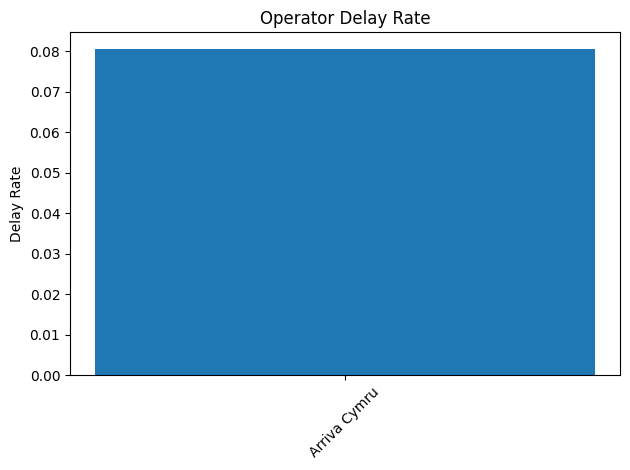

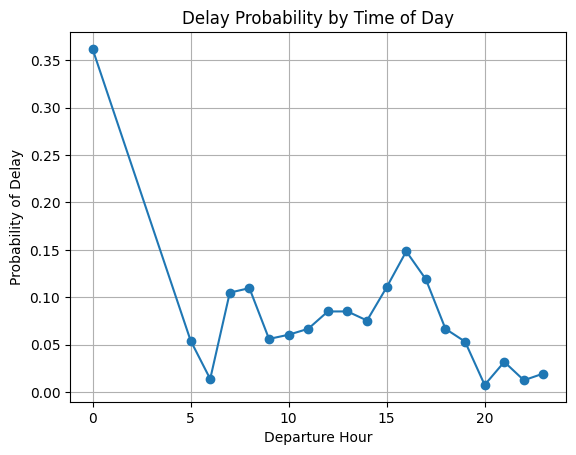


Most Affected Stops (High Delay Rate):
            FromStop  DelayRate   AvgSpeed
282      Eagle Hotel   0.479167  16.039392
876  St Alban`s View   0.472727  11.880035
317     Ffordd Powys   0.470588  12.364921
260          Delfryn   0.466667   8.543334
281      Eagle Hotel   0.465517  13.546301


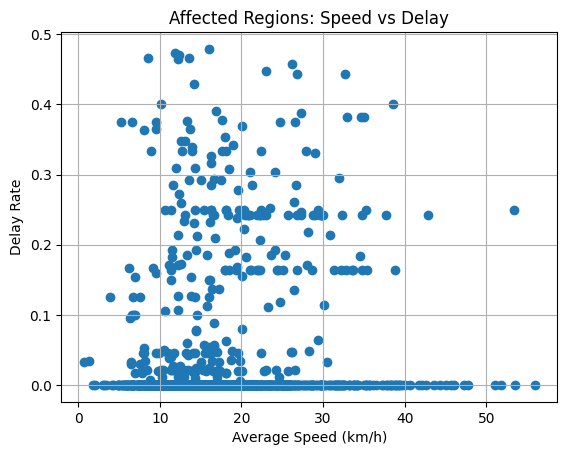


Delay Prediction Comparison:
Predicted      0     1
Actual                
0          57186   240
1           3771  1270

✓ Pipeline outputs saved to: c:\Users\97336\OneDrive\Desktop\DataSci_Coursework\system_outputs

SYSTEM DEVELOPMENT COMPLETE


In [45]:
# =============================================================================
# SYSTEM DEVELOPMENT: ANALYTICS PIPELINE & VISUALIZATION
# (Built directly on existing notebook outputs)
# =============================================================================

import matplotlib.pyplot as plt
import pandas as pd

print("="*80)
print("SYSTEM DEVELOPMENT: ANALYTICS PIPELINE VISUALIZATION")
print("="*80)

# ---------------------------------------------------------------------------
# PIPELINE SUMMARY (SOFTWARE VIEW)
# ---------------------------------------------------------------------------
# Data Source  -> SQLite / Pickle
# Feature Eng -> Pandas
# Models      -> Scikit-learn (RF, LR, DT, KMeans)
# Outputs     -> Predictions + Aggregations
# Visualization -> Matplotlib (Dashboard-ready)
# ---------------------------------------------------------------------------

# ============================================================================
# 1. OPERATOR PERFORMANCE ANALYTICS
# ============================================================================

operator_performance = (
    model_df
    .groupby("OperatorName")
    .agg(
        AvgRuntime=("RunTimeMinutes", "mean"),
        AvgSpeed=("ImpliedSpeedKmh", "mean"),
        DelayRate=("IsDelayed", "mean"),
        Trips=("JourneyID", "count")
    )
    .sort_values("DelayRate", ascending=False)
)

print("\nTop Operators by Delay Rate:")
print(operator_performance.head(5))

# Visualization
plt.figure()
plt.bar(operator_performance.index, operator_performance["DelayRate"])
plt.ylabel("Delay Rate")
plt.title("Operator Delay Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ============================================================================
# 2. DELAY PATTERNS BY TIME OF DAY
# ============================================================================

delay_by_hour = (
    model_df
    .groupby("DepartureHour")["IsDelayed"]
    .mean()
    .reset_index()
)

plt.figure()
plt.plot(delay_by_hour["DepartureHour"], delay_by_hour["IsDelayed"], marker="o")
plt.xlabel("Departure Hour")
plt.ylabel("Probability of Delay")
plt.title("Delay Probability by Time of Day")
plt.grid(True)
plt.show()

# ============================================================================
# 3. AFFECTED REGIONS (STOP-LEVEL CONGESTION)
# ============================================================================

affected_regions = (
    model_df
    .groupby(["FromStop", "FromLat", "FromLon"])
    .agg(
        AvgSpeed=("ImpliedSpeedKmh", "mean"),
        DelayRate=("IsDelayed", "mean"),
        Count=("JourneyID", "count")
    )
    .reset_index()
    .sort_values("DelayRate", ascending=False)
)

print("\nMost Affected Stops (High Delay Rate):")
print(affected_regions.head(5)[["FromStop", "DelayRate", "AvgSpeed"]])

# Visualization (Speed vs Delay)
plt.figure()
plt.scatter(
    affected_regions["AvgSpeed"],
    affected_regions["DelayRate"],
)
plt.xlabel("Average Speed (km/h)")
plt.ylabel("Delay Rate")
plt.title("Affected Regions: Speed vs Delay")
plt.grid(True)
plt.show()

# ============================================================================
# 4. MODEL OUTPUT VISUALIZATION (DELAY PREDICTIONS)
# ============================================================================

model_df["PredictedDelay"] = rf_model.predict(
    model_df[delay_features]
)

comparison = pd.crosstab(
    model_df["IsDelayed"],
    model_df["PredictedDelay"],
    rownames=["Actual"],
    colnames=["Predicted"]
)

print("\nDelay Prediction Comparison:")
print(comparison)

# ============================================================================
# 5. EXPORT PIPELINE OUTPUTS (DASHBOARD-READY)
# ============================================================================

from pathlib import Path
output_path = Path(base) / "system_outputs"
output_path.mkdir(exist_ok=True)

operator_performance.to_pickle(output_path / "operator_performance.pkl")
delay_by_hour.to_pickle(output_path / "delay_by_hour.pkl")
affected_regions.to_pickle(output_path / "affected_regions.pkl")

print(f"\n✓ Pipeline outputs saved to: {output_path}")

print("\nSYSTEM DEVELOPMENT COMPLETE")
print("="*80)


In [1]:
# ============================================================================
# SECURE DATA HANDLING PRACTICES
# ============================================================================

"""
Secure data handling is critical when building analytics pipelines, especially if
your system accepts external input (e.g., user queries in a dashboard or API).
One common threat is SQL injection, where malicious input could modify your SQL 
queries and access or corrupt sensitive data.

Key practices include:
1. Use parameterized queries for any SQL statements that include user input.
   Example:
       df = pd.read_sql("SELECT * FROM Operators WHERE OperatorName = ?", conn, params=(user_input,))
2. Validate and sanitize all external inputs before processing.
3. Close database connections after use to prevent leaks (already done with conn.close()).
4. Avoid storing sensitive data in plaintext; use encryption or environment variables if needed.

In the current analytics pipeline:
- All SQL queries are static and use only pre-defined table and column names.
- No external user input is passed to SQL queries.
- Database connections are properly closed at the end.

Therefore, in the current implementation, **SQL injection and other user input threats do not apply**.
"""


'\nSecure data handling is critical when building analytics pipelines, especially if\nyour system accepts external input (e.g., user queries in a dashboard or API).\nOne common threat is SQL injection, where malicious input could modify your SQL \nqueries and access or corrupt sensitive data.\n\nKey practices include:\n1. Use parameterized queries for any SQL statements that include user input.\n   Example:\n       df = pd.read_sql("SELECT * FROM Operators WHERE OperatorName = ?", conn, params=(user_input,))\n2. Validate and sanitize all external inputs before processing.\n3. Close database connections after use to prevent leaks (already done with conn.close()).\n4. Avoid storing sensitive data in plaintext; use encryption or environment variables if needed.\n\nIn the current analytics pipeline:\n- All SQL queries are static and use only pre-defined table and column names.\n- No external user input is passed to SQL queries.\n- Database connections are properly closed at the end.\n\nThe